In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [2]:
# ! pip install rfpimp

In [3]:
from rfpimp import *
from sklearn.metrics import r2_score

/home/users/ssingla2/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [12]:
path = '/ifs/gsb/usf_interns/Parser_Project/ParsedDocumentsFolder/10KParsed/'
files=os.listdir(path)

In [13]:
files[0]

'parsed_10-K_0000882835-13-000008.txt'

In [14]:
len(files)

4657

In [15]:
filesAvailable=[]
for file in files:
    if file.endswith('.txt'):
#     print(file)
        filesAvailable.append(file.split('_')[2])

In [16]:
len(filesAvailable)

4655

In [17]:
import pandas
# colnames = ['file','date','year','ff48','rmse_post','alpha','rmse_prior','ret_abn','mkt_cap','btm','nasdaq','unc']
data = pandas.read_csv('/ifs/gsb/usf_interns/regression.csv',low_memory=False)

In [18]:
data.shape

(76991, 12)

In [19]:
data.head()

,file,date,year,ff48,rmse_post,alpha,rmse_prior,ret_abn,mkt_cap,btm,nasdaq,unc
0,0000038777-94-000002.txt,19940106,1994,47,2.550896,0.046058,1.818059,0.044728,8.121498,-1.709906,0,0.002388
1,0000912057-94-000081.txt,19940112,1994,36,3.668728,0.123651,2.361240,0.055246,6.865900,-1.505460,1,0.001039
2,0000950124-94-000148.txt,19940118,1994,38,1.404607,0.050069,1.600168,0.022987,4.480014,0.383229,0,0.001815
3,0000950123-94-000205.txt,19940126,1994,34,1.933443,0.065622,1.744151,0.039155,5.963354,-0.583306,0,0.002942
4,0000950152-94-000048.txt,19940126,1994,21,1.989374,-0.006767,1.417814,0.024035,5.289432,-0.598769,0,0.004023


In [20]:
fnames = data.file.tolist()

In [21]:
len(fnames)

76991

In [22]:
def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    if (a_set & b_set): 
        return (a_set & b_set) 
    else: 
        print("No common elements")

In [23]:
common_files=list(common_member(filesAvailable, fnames))

In [24]:
len(common_files)

2551

In [25]:
common_files[0]

'0001564590-15-000794.txt'

In [26]:
# for file in common_files:
#     shutil.copy('/ifs/gsb/usf_interns/Parser_Project/ParsedDocumentsFolder/10KParsed/parsed_10-K_'+file,
#                 '/ifs/gsb/usf_interns/Parser_Project/ParsedDocumentsFolder/10KParsed/Regression_10Ks')

In [27]:
regressionData = data[data['file'].isin(common_files)] 

In [28]:
regressionData.head()

,file,date,year,ff48,rmse_post,alpha,rmse_prior,ret_abn,mkt_cap,btm,nasdaq,unc
57880,0000796343-10-000003.txt,20100122,2010,34,1.344314,0.064598,1.878657,0.028867,9.840227,-1.271154,1,0.004315
57882,0001193125-10-014549.txt,20100128,2010,44,1.043391,0.039671,3.058759,0.011547,8.923082,-0.151860,0,0.004921
57885,0001193125-10-014973.txt,20100128,2010,2,0.497073,0.044679,1.226339,0.011354,8.400413,-1.235654,0,0.003744
57887,0001193125-10-016932.txt,20100129,2010,12,0.979935,0.326559,2.599033,0.023549,9.464948,-2.028037,1,0.005534
57892,0001193125-10-017074.txt,20100129,2010,34,3.381970,0.118845,2.389018,0.002845,8.030131,-1.763918,0,0.003270


In [29]:
%store -r outputTfidfTotalDict 
%store -r total_word_per_file

In [30]:
regressionData['file']="parsed_10-K_"+regressionData.file

/opt/jupyter/hub/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
regressionData['tfidf']=regressionData.file.map(outputTfidfTotalDict)

/opt/jupyter/hub/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
regressionData['unc_word_count']=regressionData.file.map(total_word_per_file)

/opt/jupyter/hub/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
regressionData.head()

,file,date,year,ff48,rmse_post,alpha,rmse_prior,ret_abn,mkt_cap,btm,nasdaq,unc,tfidf,unc_word_count
57880,parsed_10-K_0000796343-10-000003.txt,20100122,2010,34,1.344314,0.064598,1.878657,0.028867,9.840227,-1.271154,1,0.004315,0.202695,649
57882,parsed_10-K_0001193125-10-014549.txt,20100128,2010,44,1.043391,0.039671,3.058759,0.011547,8.923082,-0.151860,0,0.004921,0.348415,841
57885,parsed_10-K_0001193125-10-014973.txt,20100128,2010,2,0.497073,0.044679,1.226339,0.011354,8.400413,-1.235654,0,0.003744,0.322728,69
57887,parsed_10-K_0001193125-10-016932.txt,20100129,2010,12,0.979935,0.326559,2.599033,0.023549,9.464948,-2.028037,1,0.005534,0.219495,387
57892,parsed_10-K_0001193125-10-017074.txt,20100129,2010,34,3.381970,0.118845,2.389018,0.002845,8.030131,-1.763918,0,0.003270,0.278623,342


In [74]:
correlation = regressionData['rmse_post'].corr(regressionData['tfidf'])
correlation

-0.05562481629872157

In [75]:
correlation = regressionData['rmse_post'].corr(regressionData['unc_word_count'])
correlation

0.019255472543645215

In [76]:
df_train, df_test = train_test_split(regressionData, test_size = 0.30, random_state = 90)

In [77]:
important_feature_names = ['alpha','rmse_prior','ret_abn','mkt_cap','btm','nasdaq','unc_word_count']

In [78]:
labels = df_train['rmse_post']
df_train=df_train[important_feature_names]

In [79]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(bootstrap=True,
 random_state = 42,
 n_estimators= 1000,
 min_samples_split= 8,
 min_samples_leaf= 3,
 max_features= 'sqrt',
 max_depth= 80)

In [80]:
rf.fit(df_train, labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [81]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [82]:
# ! pip install statsmodels

In [83]:
X2 = sm.add_constant(df_train)
est = sm.OLS(labels, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              rmse_post   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     130.8
Date:                Tue, 26 May 2020   Prob (F-statistic):          2.23e-155
Time:                        00:10:20   Log-Likelihood:                -822.43
No. Observations:                1785   AIC:                             1661.
Df Residuals:                    1777   BIC:                             1705.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5350      0.107      5.

/home/users/ssingla2/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


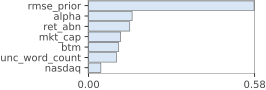

In [84]:
I = importances(rf, df_train, labels)
plot_importances(I)

In [85]:
rf.score(X = df_train, y= labels)

0.697028111102968

In [86]:
test_data=df_test[important_feature_names]

In [87]:
predictions = rf.predict(test_data)

In [88]:
r2_score(df_test['rmse_post'], predictions)

0.41760760839974087

In [89]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [90]:
X2 = sm.add_constant(df_train)
est = sm.OLS(labels, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              rmse_post   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     130.8
Date:                Tue, 26 May 2020   Prob (F-statistic):          2.23e-155
Time:                        00:13:37   Log-Likelihood:                -822.43
No. Observations:                1785   AIC:                             1661.
Df Residuals:                    1777   BIC:                             1705.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5350      0.107      5.

/home/users/ssingla2/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
